## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head(20)
merge_df.tail(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1873,z795,Naftisol,Female,13,29,0,45.000000,0
1874,z795,Naftisol,Female,13,29,5,46.833475,0
1875,z795,Naftisol,Female,13,29,10,48.030804,0
1876,z795,Naftisol,Female,13,29,15,49.368132,1
1877,z795,Naftisol,Female,13,29,20,53.280657,1
1878,z795,Naftisol,Female,13,29,25,57.947100,2
1879,z795,Naftisol,Female,13,29,30,59.789636,2
1880,z795,Naftisol,Female,13,29,35,60.435654,2
1881,z795,Naftisol,Female,13,29,40,62.376639,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [2]:
# Checking the number of mice.
mouse_count=merge_df["Mouse ID"].value_counts()
len(mouse_count)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupsearch=merge_df[["Mouse ID","Timepoint"]]
dupsearch
# df.drop_duplicates(subset=['bio', 'center', 'outcome'])
dupsearch[merge_df.duplicated(keep=False)]

,Mouse ID,Timepoint
908,g989,0
909,g989,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989=merge_df[merge_df["Mouse ID"]=="g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge=merge_df.drop(index=909)
clean_merge
#does "duplicate mouse" mean I'm looking for an entire mouse's data that's duplicated to be deleted,
#or is it just the second 0 timepoint of mouse g989?

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
# Won't this be the same number of mice?  Since there was only one duplicated timepoint?
#print(len(clean_merge))

new_mouse_count=clean_merge["Mouse ID"].value_counts()
new_mouse_count

g989    12
x581    10
l700    10
y478    10
l897    10
        ..
f932     1
d133     1
x226     1
b447     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [7]:
#find drug names; 
clean_merge[["Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
clean_merge["Drug Regimen"].value_counts()

#change Tumor Volume to int32
clean_merge["Tumor Volume (mm3)"].astype("int32").dtypes


#new df variables for drug names
capo_df=clean_merge[clean_merge["Drug Regimen"]=="Capomulin"]
capo_np=capo_df["Tumor Volume (mm3)"]

rami_df=clean_merge[clean_merge["Drug Regimen"]=="Ramicane"]
rami_np=rami_df["Tumor Volume (mm3)"]

keta_df=clean_merge[clean_merge["Drug Regimen"]=="Ketapril"]
keta_np=keta_df["Tumor Volume (mm3)"]

naft_df=clean_merge[clean_merge["Drug Regimen"]=="Naftisol"]
naft_np=naft_df["Tumor Volume (mm3)"]

zoni_df=clean_merge[clean_merge["Drug Regimen"]=="Zoniferol"]
zoni_np=zoni_df["Tumor Volume (mm3)"]

stel_df=clean_merge[clean_merge["Drug Regimen"]=="Stelasyn"]
stel_np=stel_df["Tumor Volume (mm3)"]

plac_df=clean_merge[clean_merge["Drug Regimen"]=="Placebo"]
plac_np=plac_df["Tumor Volume (mm3)"]

infu_df=clean_merge[clean_merge["Drug Regimen"]=="Infubinol"]
infu_np=infu_df["Tumor Volume (mm3)"]

ceft_df=clean_merge[clean_merge["Drug Regimen"]=="Ceftamin"]
ceft_np=ceft_df["Tumor Volume (mm3)"]

prop_df=clean_merge[clean_merge["Drug Regimen"]=="Propriva"]
prop_np=prop_df["Tumor Volume (mm3)"]

capo_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [18]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groups = clean_merge.groupby("Drug Regimen")
#OMG! describe for basic data
summary=drug_groups["Tumor Volume (mm3)"].describe()

summary

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,160.0,52.368318,6.502160,45.000000,47.107256,50.909965,56.259803,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [21]:
#adjust summary table to reflect values you want

###MEAN
# tumor_volume_av = round(drug_groups["Tumor Volume (mm3)"].mean(),2)

###MEDIAN
tumor_vol_med = round(drug_groups["Tumor Volume (mm3)"].median(),2)

###VARIANCE
tumor_var = round(drug_groups["Tumor Volume (mm3)"].median(),2)

###STANDARD DEVIATION #don't even need this, .describe() will find for you.
# tumor_std = round(drug_groups["Tumor Volume (mm3)"].std(),2)

###SEM
tumor_sem=round(drug_groups['Tumor Volume (mm3)'].sem(),2)

# sum_table[["Average Volume"],["Median Volume"], ["Variance"], ["Standard Deviation"], ["SEM"]] = 

#add columns you want
summary["Variance"]=tumor_var
summary["Median"]=tumor_vol_med
# summary["Standard Deviation"]=tumor_std
summary["SEM"]=tumor_sem

summary[["mean","std","Median","Variance","SEM"]]
tumor_by_drug_summary=summary[["mean","Median","Variance","std","SEM"]]
tumor_by_drug_summary
# tumor_volume_av
# tumor_vol_med
# tumor_var
# tumor_std
# tumor_sem

,mean,Median,Variance,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.56,41.56,4.994774,0.33
Ceftamin,52.591172,51.78,51.78,6.268188,0.47
Infubinol,52.884795,51.82,51.82,6.567243,0.49
Ketapril,55.235638,53.70,53.70,8.279709,0.60
Naftisol,54.331565,52.51,52.51,8.134708,0.60
Placebo,54.033581,52.29,52.29,7.821003,0.58
Propriva,52.368318,50.91,50.91,6.502160,0.51
Ramicane,40.216745,40.67,40.67,4.846308,0.32
Stelasyn,54.233149,52.43,52.43,7.710419,0.57


In [ ]:
# WHAT I TRIED FIRST :D
# capo_mean=np.mean(["Tumor Volume (mm3)"])
# capo_mean
#find mean of the tumor volume while the drug regimen = capomulin

# capo_mean=capo_df["Tumor Volume (mm3)"].mean()
# capo_mean

# clean_merge[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
###MEDIAN
# cap_med=np.med(capo_np, ddof=0)
# ram_med=np.med(rami_np, ddof=0)
# ket_med=np.med(keta_np, ddof=0)
# naf_med=np.med(naft_np, ddof=0)
# zon_med=np.med(zoni_np, ddof=0)
# stel_med=np.med(stel_np, ddof=0)
# pla_med=np.med(plac_np, ddof=0)
# inf_med=np.med(infu_np, ddof=0)
# cef_med=np.med(ceft_np, ddof=0)
# pro_med=np.med(prop_np, ddof=0)

###VARIANCE
# cap_var=np.var(capo_np, ddof=0)
# ram_var=np.var(rami_np, ddof=0)
# ket_var=np.var(keta_np, ddof=0)
# naf_var=np.var(naft_np, ddof=0)
# zon_var=np.var(zoni_np, ddof=0)
# stel_var=np.var(stel_np, ddof=0)
# pla_var=np.var(plac_np, ddof=0)
# inf_var=np.var(infu_np, ddof=0)
# cef_var=np.var(ceft_np, ddof=0)
# pro_var=np.var(prop_np, ddof=0)

###STANDARD DEVIATION
# cap_std=np.std(capo_np, ddof=0)
# ram_std=np.std(rami_np, ddof=0)
# ket_std=np.std(keta_np, ddof=0)
# naf_std=np.std(naft_np, ddof=0)
# zon_std=np.std(zoni_np, ddof=0)
# stel_std=np.std(stel_np, ddof=0)
# pla_std=np.std(plac_np, ddof=0)
# inf_std=np.std(infu_np, ddof=0)
# cef_std=np.std(ceft_np, ddof=0)
# pro_std=np.std(prop_np, ddof=0)

###SEM
# sem(sample['Tumor Volume (mm3)'])
# cap_sem = st.sem(capo_np, axis=0, ddof=1, nan_policy='propagate')
# rami_sem = st.sem(rami_np, axis=0, ddof=1, nan_policy='propagate')
# keta_sem = st.sem(keta_np, axis=0, ddof=1, nan_policy='propagate')
# naft_sem = st.sem(naft_np, axis=0, ddof=1, nan_policy='propagate')
# zoni_sem = st.sem(zoni_np, axis=0, ddof=1, nan_policy='propagate')
# stel_sem = st.sem(stel_np, axis=0, ddof=1, nan_policy='propagate')
# plac_sem = st.sem(plac_np, axis=0, ddof=1, nan_policy='propagate')
# infu_sem = st.sem(infu_np, axis=0, ddof=1, nan_policy='propagate')
# ceft_sem = st.sem(ceft_np, axis=0, ddof=1, nan_policy='propagate')
# prop_sem = st.sem(prop_np, axis=0, ddof=1, nan_policy='propagate')

In [24]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_by_drug_summary=tumor_by_drug_summary.rename(columns={"mean":"Mean", "std":"Standard Deviation"})
tumor_by_drug_summary

,Mean,Median,Variance,Standard/n Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.56,41.56,4.994774,0.33
Ceftamin,52.591172,51.78,51.78,6.268188,0.47
Infubinol,52.884795,51.82,51.82,6.567243,0.49
Ketapril,55.235638,53.70,53.70,8.279709,0.60
Naftisol,54.331565,52.51,52.51,8.134708,0.60
Placebo,54.033581,52.29,52.29,7.821003,0.58
Propriva,52.368318,50.91,50.91,6.502160,0.51
Ramicane,40.216745,40.67,40.67,4.846308,0.32
Stelasyn,54.233149,52.43,52.43,7.710419,0.57


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# sum_attempt=clean_merge.groupby("Drug Regimen").describe()
# sum_attempt
# sum_attempt=sum_attempt.drop(['min', 'max', '25%', '50%', '75%'], axis=1)

## Bar and Pie Charts

TypeError: 'int' object is not iterable

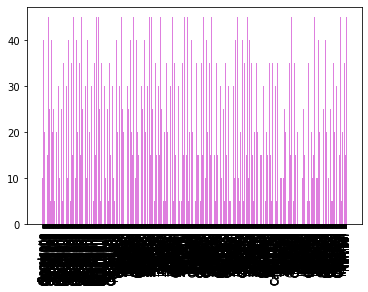

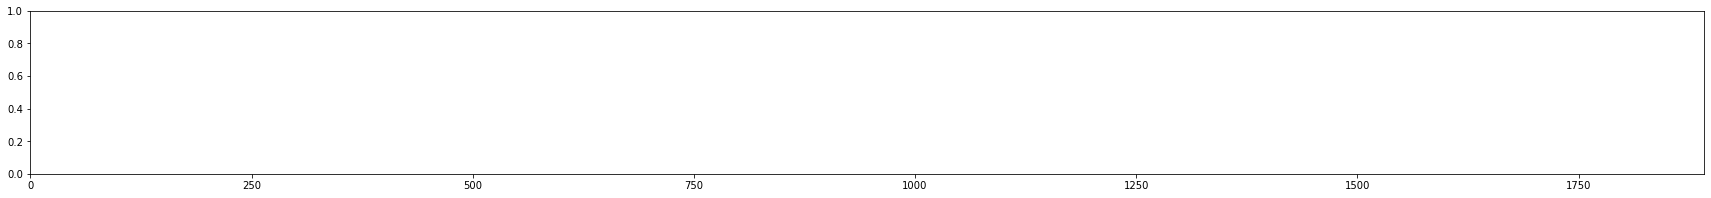

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#y data is timepoints, x data is drug regimens"
drugs=["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Infubinol","Ceftamin","Propriva"]
x_axis = np.arange(len(drugs))
timepoints=
# ticks=[value+0.4 for value in x_axis]

plt.bar(x_axis, clean_merge["Timepoint"], color='m', alpha=0.5, align="edge")
# plt.xticks(ticks, clean_merge["Drug Regimen"], rotation="vertical")
plt.figure(figsize=(30,3))

plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(50))
plt.show()


In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


SyntaxError: invalid syntax (<ipython-input-45-8e5771c0eaa8>, line 3)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
